QUESTION 1:- Create a dataset (.csv file) having following features- experience of the candidate,
written score, interview score and salary. Based on three input features, HR decide
the salary of the selected candidates. Using this data, KNN model build a for HR
department that can help them decide salaries of the candidates. Predict the salaries
for the following candidates, by executing the model (for different values of K):

(a) 5 Yrs experience, 8 written test score, 10 interview score

(b) 8 Yrs experience, 7 written test score, 6 interview score


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = {
    'Experience': [1, 3, 5, 7, 9, 2, 4, 6, 8, 10],
    'WrittenScore': [6, 7, 9, 6, 8, 7, 9, 5, 6, 10],
    'InterviewScore': [7, 6, 8, 9, 6, 5, 7, 9, 5, 9],
    'Salary': [40000, 50000, 60000, 70000, 80000, 45000, 55000, 65000, 75000, 90000]
}
df = pd.DataFrame(data)
df.to_csv('hr_salary_data.csv', index=False)
print("Dataset created and saved as 'hr_salary_data.csv'.")


df = pd.read_csv('hr_salary_data.csv')


X = df[['Experience', 'WrittenScore', 'InterviewScore']]
y = df['Salary']

test_candidates = [
    [5, 8, 10],  # Candidate A
    [8, 7, 6]    # Candidate B
]

print("\nSalary Predictions (KNN Regression):")
for k in [1, 3, 5]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)

    predictions = model.predict(test_candidates)
    print(f"\nFor K = {k}:")
    print(f"(a) 5 Yrs, Written=8, Interview=10 ➜ Predicted Salary = ₹{predictions[0]:,.2f}")
    print(f"(b) 8 Yrs, Written=7, Interview=6  ➜ Predicted Salary = ₹{predictions[1]:,.2f}")


Dataset created and saved as 'hr_salary_data.csv'.

Salary Predictions (KNN Regression):

For K = 1:
(a) 5 Yrs, Written=8, Interview=10 ➜ Predicted Salary = ₹60,000.00
(b) 8 Yrs, Written=7, Interview=6  ➜ Predicted Salary = ₹80,000.00

For K = 3:
(a) 5 Yrs, Written=8, Interview=10 ➜ Predicted Salary = ₹61,666.67
(b) 8 Yrs, Written=7, Interview=6  ➜ Predicted Salary = ₹75,000.00

For K = 5:
(a) 5 Yrs, Written=8, Interview=10 ➜ Predicted Salary = ₹60,000.00
(b) 8 Yrs, Written=7, Interview=6  ➜ Predicted Salary = ₹70,000.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


QUESTION 2:- Create a dataset (.csv file) having following features- Graduations percentage,
experience of the candidate, written score, interview score and selection. Selection
feature is binary in nature and contains the status of the candidate. Also store at least
25 records in this dataset.

Using this data, build a Bayesian learning model for HR department that can help
them to decide whether the candidate will be selected or not. Take 80% data as
training data and remaining a testing data randomly. Using the built model, predict
the status for the following unseen data:

(a) 90 %, 5 Yrs experience, 8 written test score, 10 interview score

(b) 75%, 8 Yrs experience, 7 written test score, 6 interview score

Also calculate the possible classification metrics for the above cases and save these
values in the .CSV file.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


data = {
    'Graduation%': [85, 70, 60, 90, 88, 76, 65, 92, 80, 78, 55, 83, 67, 91, 82, 74, 68, 69, 73, 79, 81, 60, 58, 95, 87],
    'Experience': [2, 3, 1, 5, 4, 6, 2, 7, 3, 5, 1, 4, 2, 6, 4, 3, 2, 3, 4, 5, 3, 1, 2, 6, 5],
    'WrittenScore': [6, 5, 4, 8, 7, 6, 5, 9, 7, 8, 3, 7, 4, 9, 6, 6, 4, 5, 6, 8, 7, 3, 4, 9, 8],
    'InterviewScore': [7, 6, 5, 9, 8, 7, 5, 10, 7, 9, 4, 8, 5, 9, 7, 6, 5, 6, 7, 9, 8, 4, 4, 10, 9],
    'Selection': [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)
df.to_csv("candidate_selection_data.csv", index=False)

df = pd.read_csv("candidate_selection_data.csv")


X = df[['Graduation%', 'Experience', 'WrittenScore', 'InterviewScore']]
y = df['Selection']

# Random split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)


unseen_data = [
    [90, 5, 8, 10],   # Candidate A
    [75, 8, 7, 6]     # Candidate B
]
predictions = model.predict(unseen_data)


y_pred_test = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)


results = pd.DataFrame({
    'Candidate': ['A', 'B'],
    'Graduation%': [90, 75],
    'Experience': [5, 8],
    'WrittenScore': [8, 7],
    'InterviewScore': [10, 6],
    'PredictedSelection': predictions
})

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})


results.to_csv('predictions_output.csv', index=False)
metrics_df.to_csv('classification_metrics.csv', index=False)


print(" Predictions:")
print(results)
print("\n Classification Metrics on Test Data:")
print(metrics_df)


 Predictions:
  Candidate  Graduation%  Experience  WrittenScore  InterviewScore  \
0         A           90           5             8              10   
1         B           75           8             7               6   

   PredictedSelection  
0                   1  
1                   1  

 Classification Metrics on Test Data:
      Metric  Value
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


QUESTION 3:- For the IRIS dataset, design a decision tree classifier. Take different percentage of
training data and then observe effect on the accuracy and other quality parameters.
Also note the effect of other decision tree parameters (like max depth,
min_sample_spit etc.) on the performance of the model.

Note: Take criterion as entropy.

Accuracy vs Training Size:
   Train Size  Accuracy  Precision    Recall  F1 Score
0         0.5  0.880000   0.898148  0.880000  0.877601
1         0.7  0.888889   0.889881  0.888889  0.888765
2         0.8  0.933333   0.933333  0.933333  0.933333
3         0.9  0.866667   0.866667  0.866667  0.866667

Parameter Tuning Results:
   Max Depth  Min Samples Split  Accuracy  Precision    Recall  F1 Score
0          2                  2  0.933333   0.933333  0.933333  0.933333
1          2                  5  0.933333   0.933333  0.933333  0.933333
2          2                 10  0.933333   0.933333  0.933333  0.933333
3          3                  2  0.966667   0.969697  0.966667  0.966583
4          3                  5  0.966667   0.969697  0.966667  0.966583
5          3                 10  0.966667   0.969697  0.966667  0.966583
6          4                  2  0.933333   0.933333  0.933333  0.933333
7          4                  5  0.966667   0.969697  0.966667  0.966583
8          4  

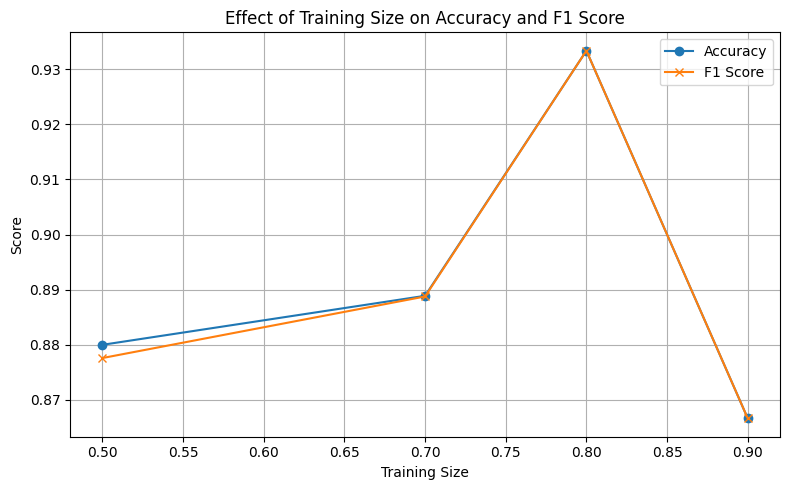

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Function to evaluate model performance
def evaluate_model(train_size, max_depth=None, min_samples_split=2):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=42, stratify=y
    )

    clf = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    return acc, report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']

# Step 2: Try different training sizes
train_sizes = [0.5, 0.7, 0.8, 0.9]
results = []

for size in train_sizes:
    acc, prec, rec, f1 = evaluate_model(train_size=size)
    results.append({
        'Train Size': size,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("Accuracy vs Training Size:")
print(results_df)

# Step 3: Effect of max_depth and min_samples_split
depths = [2, 3, 4, 5, None]
splits = [2, 5, 10]

tuning_results = []

for d in depths:
    for s in splits:
        acc, prec, rec, f1 = evaluate_model(train_size=0.8, max_depth=d, min_samples_split=s)
        tuning_results.append({
            'Max Depth': d if d is not None else 'None',
            'Min Samples Split': s,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1
        })

tuning_df = pd.DataFrame(tuning_results)
print("\nParameter Tuning Results:")
print(tuning_df)

# Optional: Save to CSV
results_df.to_csv('iris_accuracy_vs_train_size.csv', index=False)
tuning_df.to_csv('iris_tuning_results.csv', index=False)

# Plotting (Optional)
plt.figure(figsize=(8, 5))
plt.plot(results_df['Train Size'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['Train Size'], results_df['F1 Score'], marker='x', label='F1 Score')
plt.title("Effect of Training Size on Accuracy and F1 Score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


QUESTION 4:- By taking Classified Data as input, compare the performance of KNN, Bayesian
Classifier and Decision Tree model. In this comparison, you can take different
possible parameters of particular model. Save these output in a .csv file.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Step 1: Load classified data (you can replace this with your .csv)
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store results
results = []

# Step 4: KNN Model (try different k values)
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    results.append({
        'Model': f'KNN (k={k})',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    })

# Step 5: Naive Bayes (no params to tune for GaussianNB)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

results.append({
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1 Score': f1_score(y_test, y_pred, average='macro')
})

# Step 6: Decision Tree (with different depths)
for d in [3, 4, None]:
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    results.append({
        'Model': f'Decision Tree (depth={d})',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    })

# Step 7: Save to CSV
df_results = pd.DataFrame(results)
df_results.to_csv('model_comparison_results.csv', index=False)

# Display results
print("Model Comparison Results:")
print(df_results)


Model Comparison Results:
                        Model  Accuracy  Precision    Recall  F1 Score
0                   KNN (k=3)  0.911111   0.929825  0.911111  0.909502
1                   KNN (k=5)  0.911111   0.929825  0.911111  0.909502
2                   KNN (k=7)  0.933333   0.944444  0.933333  0.932660
3                 Naive Bayes  0.911111   0.915535  0.911111  0.910714
4     Decision Tree (depth=3)  0.933333   0.944444  0.933333  0.932660
5     Decision Tree (depth=4)  0.888889   0.889881  0.888889  0.888765
6  Decision Tree (depth=None)  0.888889   0.889881  0.888889  0.888765
